In [ ]:
Random Forest
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [ ]:
# imorting libraries

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split


In [ ]:
# reading file

In [47]:
data=pd.read_csv('Company_Data.csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [48]:
np.mean(data['Sales'])

7.496325

In [49]:
np.max(data['Sales'])

16.27

In [50]:
new=pd.cut(data['Sales'],bins=[0,7.5,16.3],labels=['Low','High'])
new

0      High
1      High
2      High
3       Low
4       Low
       ... 
395    High
396     Low
397     Low
398     Low
399    High
Name: Sales, Length: 400, dtype: category
Categories (2, object): ['Low' < 'High']

In [51]:
data['ShelveLoc']=data['ShelveLoc'].map({'Bad':0,'Medium':1,'Good':2})
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,Yes,Yes
1,11.22,111,48,16,260,83,2,65,10,Yes,Yes
2,10.06,113,35,10,269,80,1,59,12,Yes,Yes
3,7.40,117,100,4,466,97,1,55,14,Yes,Yes
4,4.15,141,64,3,340,128,0,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,33,14,Yes,Yes
396,6.14,139,23,3,37,120,1,55,11,No,Yes
397,7.41,162,26,12,368,159,1,40,18,Yes,Yes
398,5.94,100,79,7,284,95,0,50,12,Yes,Yes


In [52]:
data['Sales_cat']=new
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,9.50,138,73,11,276,120,0,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,2,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,1,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,1,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,0,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,1,55,11,No,Yes,Low
397,7.41,162,26,12,368,159,1,40,18,Yes,Yes,Low
398,5.94,100,79,7,284,95,0,50,12,Yes,Yes,Low


In [53]:
df=data.drop(['Sales'],axis=1)
df

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,138,73,11,276,120,0,42,17,Yes,Yes,High
1,111,48,16,260,83,2,65,10,Yes,Yes,High
2,113,35,10,269,80,1,59,12,Yes,Yes,High
3,117,100,4,466,97,1,55,14,Yes,Yes,Low
4,141,64,3,340,128,0,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,Yes,Yes,High
396,139,23,3,37,120,1,55,11,No,Yes,Low
397,162,26,12,368,159,1,40,18,Yes,Yes,Low
398,100,79,7,284,95,0,50,12,Yes,Yes,Low


In [63]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['Urban']= label_encoder.fit_transform(df['Urban'])
df['US']= label_encoder.fit_transform(df['US'])
df['Sales_cat']= label_encoder.fit_transform(df['Sales_cat'])


In [64]:
df

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,2,65,10,1,1,0
2,113,35,10,269,80,1,59,12,1,1,0
3,117,100,4,466,97,1,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1,0
396,139,23,3,37,120,1,55,11,0,1,1
397,162,26,12,368,159,1,40,18,1,1,1
398,100,79,7,284,95,0,50,12,1,1,1


In [65]:
x=df.iloc[:,0:10]
y=df['Sales_cat']
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,1,59,12,1,1
3,117,100,4,466,97,1,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1
396,139,23,3,37,120,1,55,11,0,1
397,162,26,12,368,159,1,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [70]:
y

0      0
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    0
Name: Sales_cat, Length: 400, dtype: int32

In [71]:
colnames = list(df.columns) 
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 'Sales_cat']

In [72]:
kfold = KFold(n_splits=10,shuffle = True, random_state = 40)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=40)
results = cross_val_score(model, x,y, cv=kfold)
print(results.mean())

0.8025


In [73]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, shuffle= True ,random_state=42)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7925000000000001


In [74]:
num_trees = 100
kfold = KFold(n_splits=100, shuffle = True, random_state=42)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=42)
results = cross_val_score(model, x,y, cv=kfold)
print(results.mean())

0.67


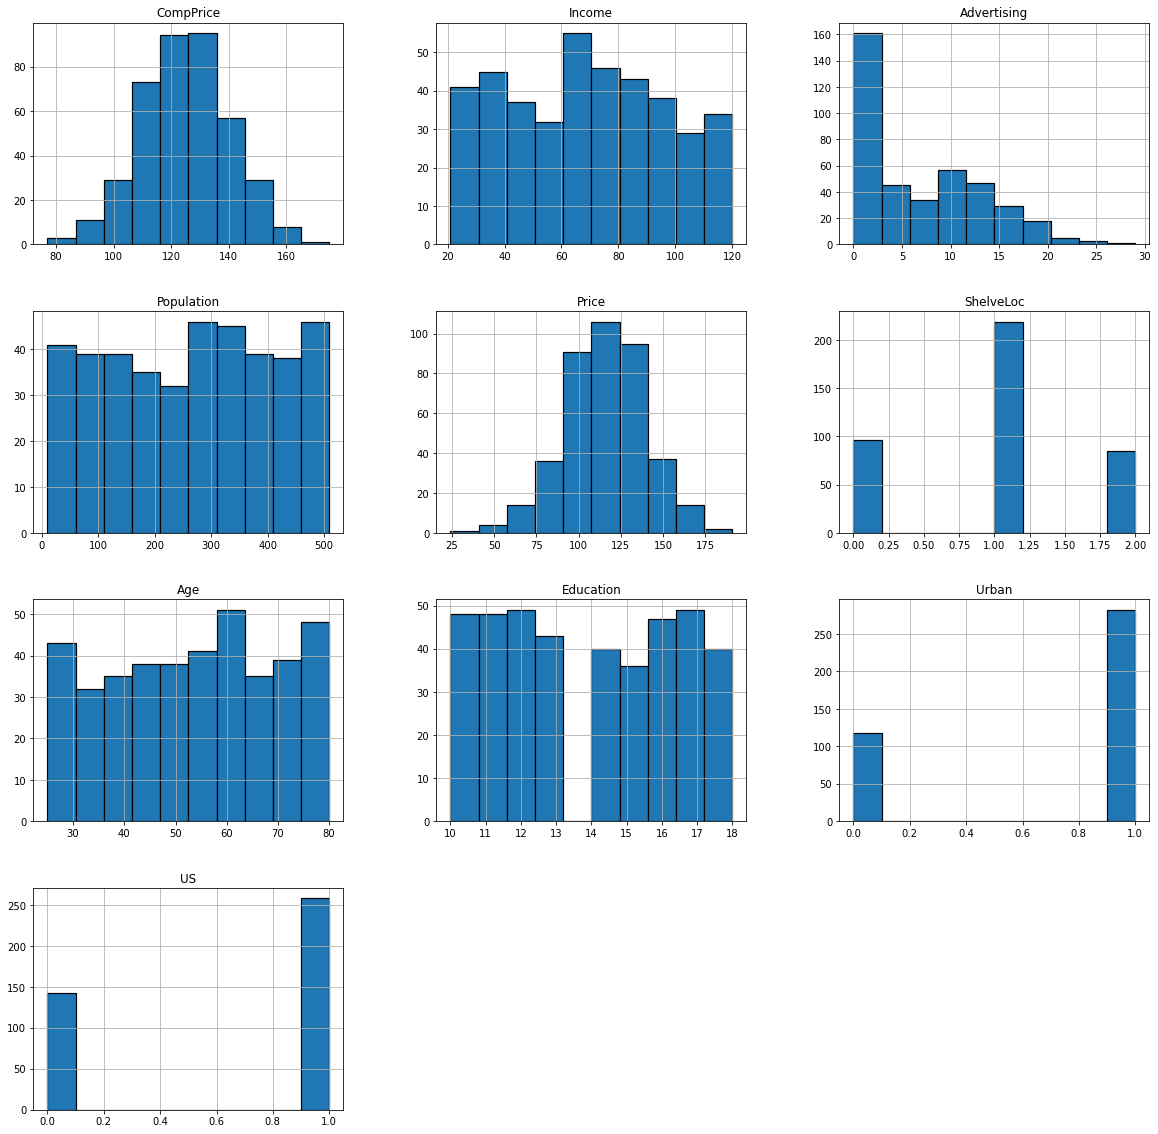

In [58]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

<AxesSubplot:>

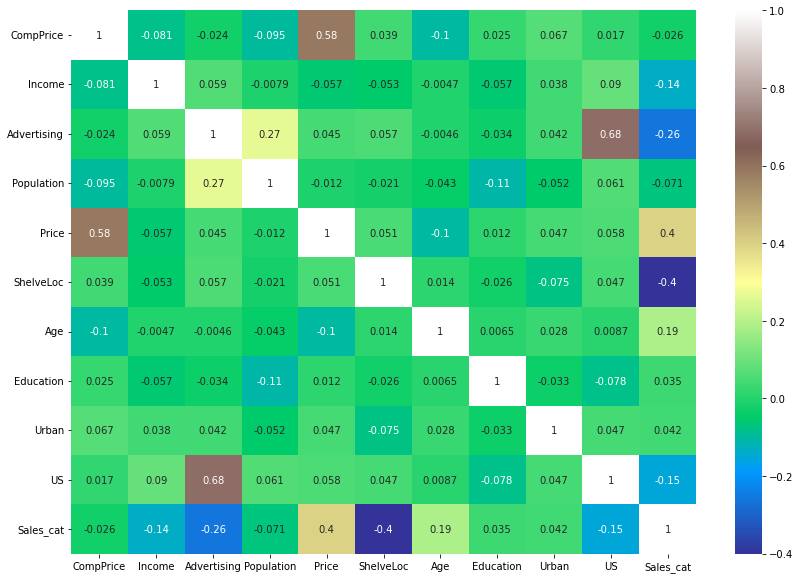

In [67]:
df.to_csv('auto.csv')
plt.figure(figsize=(14,10))
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='terrain')


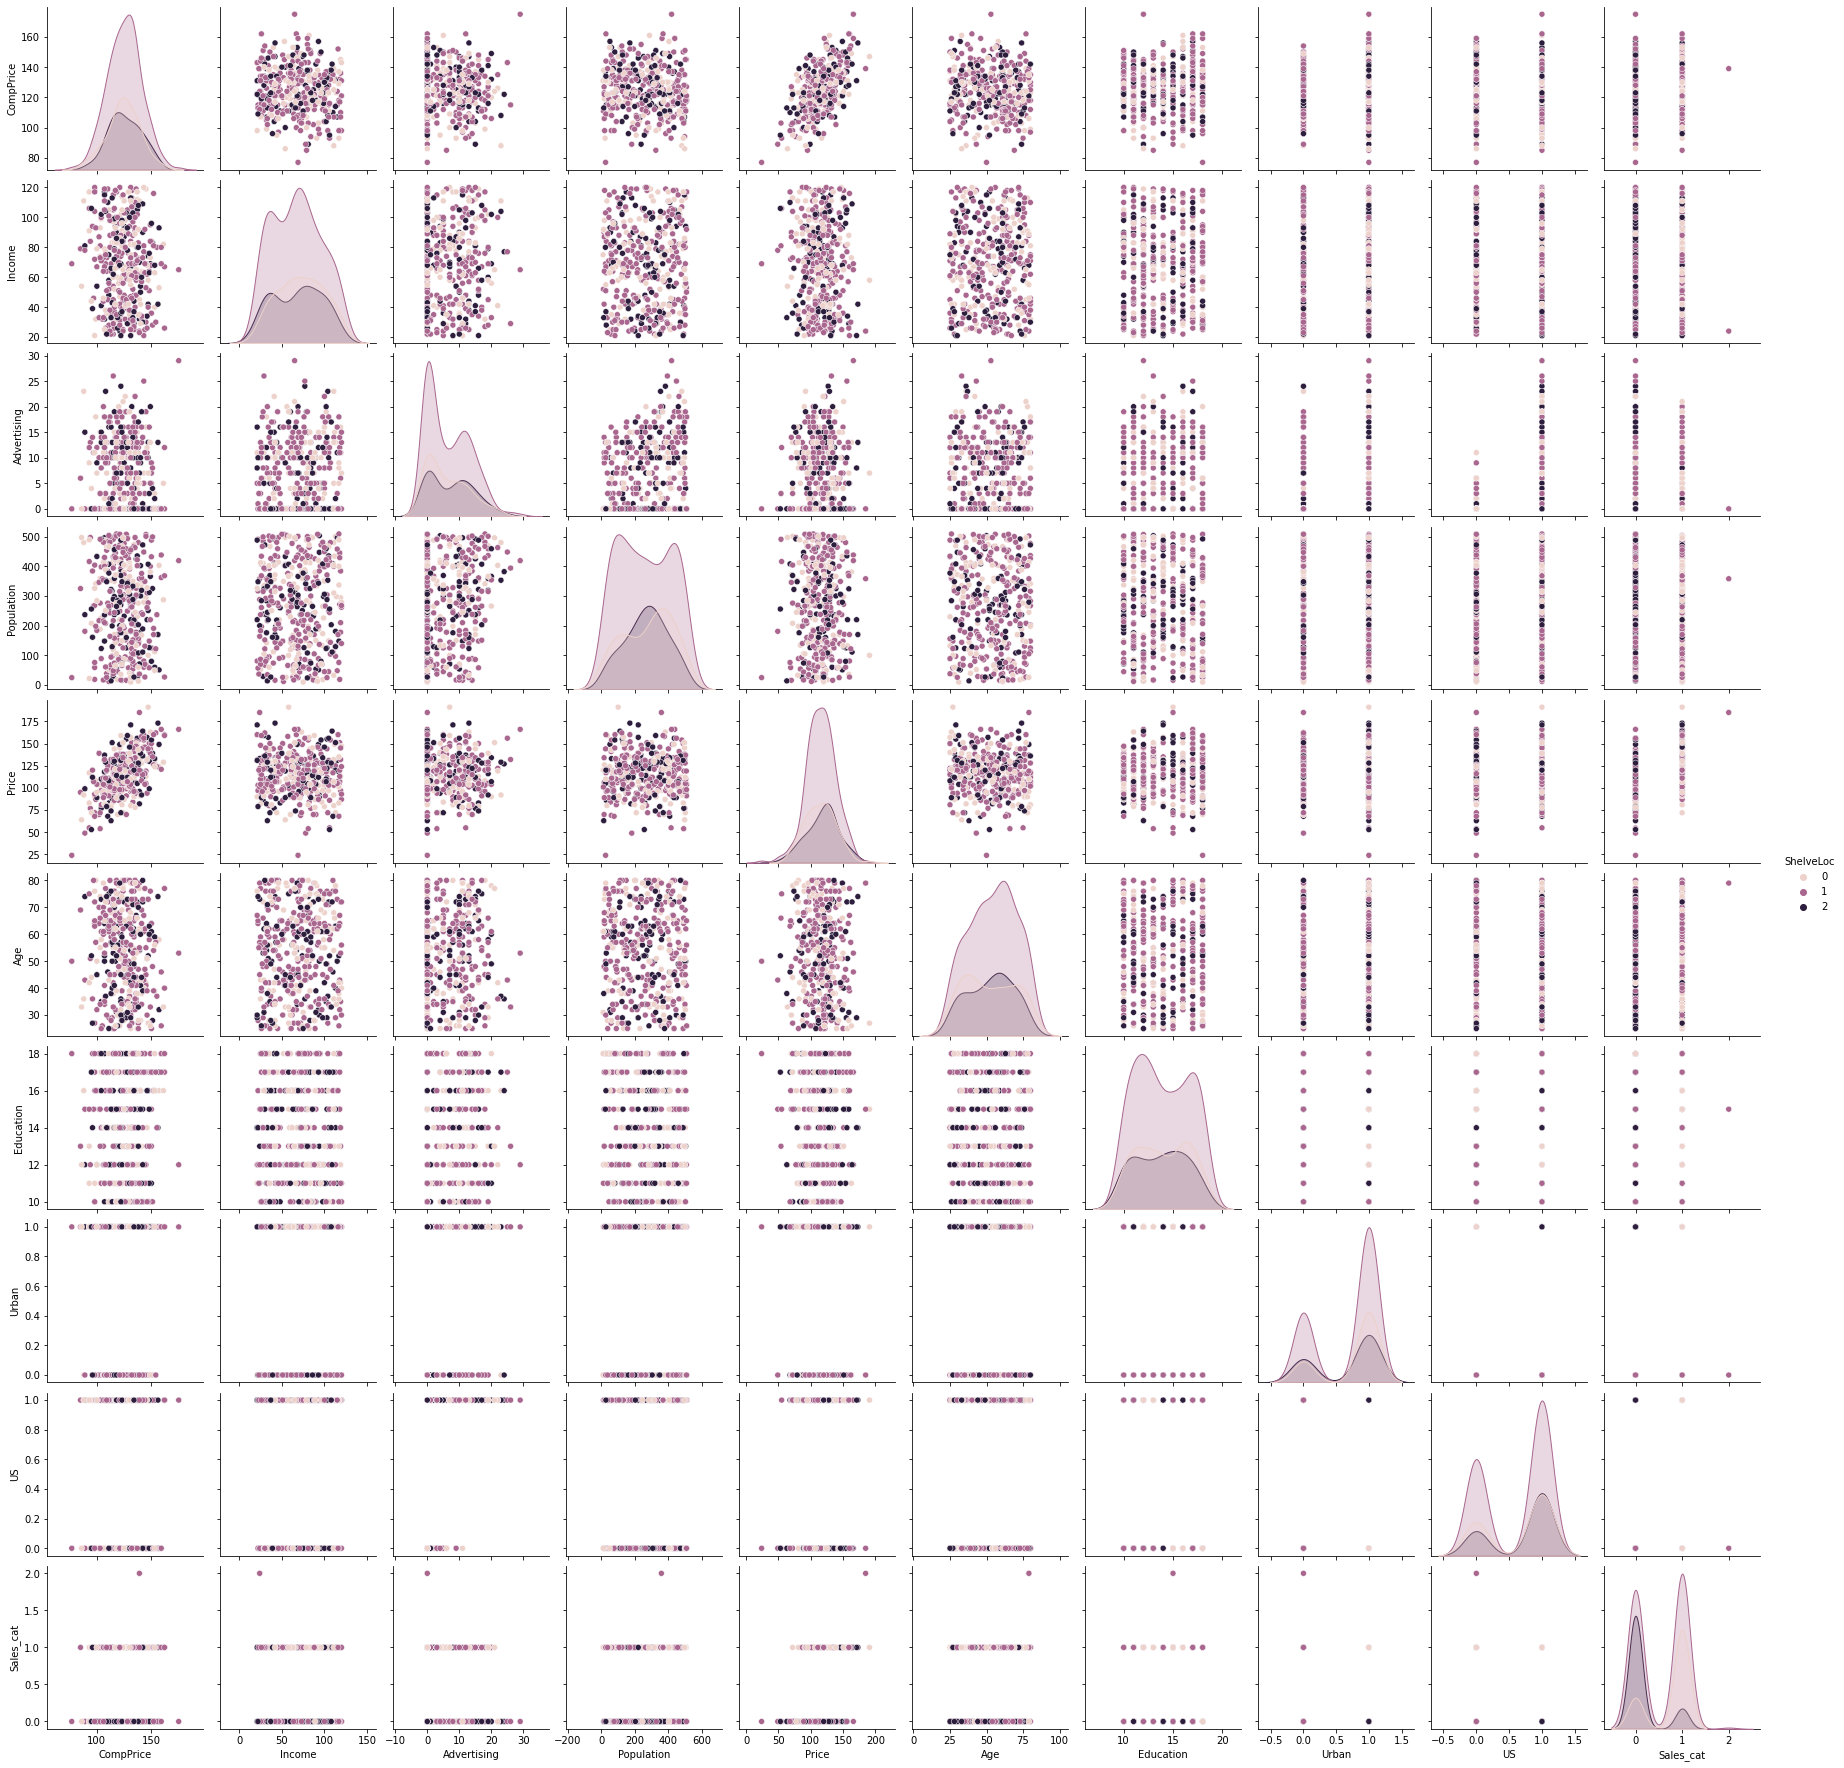

In [68]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data= df, hue = 'ShelveLoc')